# Postdam PM2.5 Forecasting 

Between 2013 and 2023, data collected by DEBB021 was used. 

To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [2]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import eda as eda
import model_base as mb

## Data Exploration

* Load Data
* Merge
* Filter and Clean


In [3]:
df_pm25 = pd.read_csv('../data/PM2.5_DE_DEBB021.csv')
df_pm10 = pd.read_csv('../data/PM10_DE_DEBB021.csv')
df_no2 = pd.read_csv('../data/NO2_DE_DEBB021.csv')
df_o3 = pd.read_csv('../data/O3_DE_DEBB021.csv')
df_so2 = pd.read_csv('../data/SO2_DE_DEBB021.csv')

df_pm25.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 00:00:00,2013-01-01 01:00:00,71.04,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
1,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 01:00:00,2013-01-01 02:00:00,20.52,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
2,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 02:00:00,2013-01-01 03:00:00,9.56,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
3,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 03:00:00,2013-01-01 04:00:00,9.45,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
4,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 04:00:00,2013-01-01 05:00:00,13.02,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90


In [4]:
df_pm25.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,6001.000000,0.000000,6001.0,6001.0,6001.0,6001.0,6001.0
Value,87648.0,10.192952,54.500614,-999.0,6.0,10.0,17.0,194.0
Validity,87648.0,1.005545,0.149514,-1.0,1.0,1.0,1.0,2.0
Verification,87648.0,1.000011,0.003378,1.0,1.0,1.0,1.0,2.0
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_pm10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,5.000000,0.000000,5.0,5.00,5.00000,5.0,5.0
Value,87648.0,14.848907,56.695262,-999.0,9.26,14.84908,23.2,705.3
Validity,87648.0,0.997456,0.123482,-1.0,1.00,1.00000,1.0,2.0
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00000,1.0,2.0
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_no2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,8.000000,0.000000,8.0,8.00,8.00,8.000000,8.00
Value,87648.0,13.725483,51.692710,-999.0,7.86,12.92,21.194304,134.09
Validity,87648.0,1.029310,0.207938,-1.0,1.00,1.00,1.000000,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00,1.000000,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_o3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,7.000000,0.000000,7.0,7.00,7.00,7.0,7.00
Value,87648.0,47.729893,66.412839,-999.0,29.03,49.93,69.9,189.88
Validity,87648.0,1.031124,0.222552,-1.0,1.00,1.00,1.0,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00,1.0,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_so2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,1.000000,0.000000,1.0,1.0,1.00,1.00,1.00
Value,87648.0,-1.665583,58.170432,-999.0,1.3,1.33,1.33,23.55
Validity,87648.0,1.652439,0.497088,-1.0,1.0,2.00,2.00,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.0,1.00,1.00,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Rename the columns for merging and delete unused columns

df_pm25 = eda.rename_df_columns(df_pm25, 'PM2.5')
df_pm25 = eda.drop_unused_df_columns(df_pm25)
df_pm25 = df_pm25[
    ['Start', 'End', 'PM2.5-Pollutant', 'PM2.5-Value', 'PM2.5-Unit', 'PM2.5-Validity', 'PM2.5-Verification']]
df_pm25.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1


In [10]:
df_pm10 = eda.rename_df_columns(df_pm10, 'PM10')
df_pm10 = eda.drop_unused_df_columns(df_pm10)
df_pm10.head()

,PM10-Pollutant,Start,End,PM10-Value,PM10-Unit,PM10-Validity,PM10-Verification
0,5,2013-01-01 00:00:00,2013-01-01 01:00:00,88.96,ug.m-3,1,1
1,5,2013-01-01 01:00:00,2013-01-01 02:00:00,25.17,ug.m-3,1,1
2,5,2013-01-01 02:00:00,2013-01-01 03:00:00,11.97,ug.m-3,1,1
3,5,2013-01-01 03:00:00,2013-01-01 04:00:00,11.73,ug.m-3,1,1
4,5,2013-01-01 04:00:00,2013-01-01 05:00:00,15.88,ug.m-3,1,1


In [11]:
df_no2 = eda.rename_df_columns(df_no2, 'NO2')
df_no2 = eda.drop_unused_df_columns(df_no2)
df_no2.head()

,NO2-Pollutant,Start,End,NO2-Value,NO2-Unit,NO2-Validity,NO2-Verification
0,8,2013-01-01 00:00:00,2013-01-01 01:00:00,22.61,ug.m-3,1,1
1,8,2013-01-01 01:00:00,2013-01-01 02:00:00,9.39,ug.m-3,1,1
2,8,2013-01-01 02:00:00,2013-01-01 03:00:00,6.13,ug.m-3,1,1
3,8,2013-01-01 03:00:00,2013-01-01 04:00:00,5.61,ug.m-3,1,1
4,8,2013-01-01 04:00:00,2013-01-01 05:00:00,5.29,ug.m-3,1,1


In [12]:
df_o3 = eda.rename_df_columns(df_o3, 'O3')
df_o3 = eda.drop_unused_df_columns(df_o3)
df_o3.head()

,O3-Pollutant,Start,End,O3-Value,O3-Unit,O3-Validity,O3-Verification
0,7,2013-01-01 00:00:00,2013-01-01 01:00:00,43.17,ug.m-3,1,1
1,7,2013-01-01 01:00:00,2013-01-01 02:00:00,57.15,ug.m-3,1,1
2,7,2013-01-01 02:00:00,2013-01-01 03:00:00,63.31,ug.m-3,1,1
3,7,2013-01-01 03:00:00,2013-01-01 04:00:00,63.18,ug.m-3,1,1
4,7,2013-01-01 04:00:00,2013-01-01 05:00:00,61.70,ug.m-3,1,1


In [13]:
df_so2 = eda.rename_df_columns(df_so2, 'SO2')
df_so2 = eda.drop_unused_df_columns(df_so2)
df_so2.head()

,SO2-Pollutant,Start,End,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1,2013-01-01 00:00:00,2013-01-01 01:00:00,12.18,ug.m-3,1,1
1,1,2013-01-01 01:00:00,2013-01-01 02:00:00,4.65,ug.m-3,1,1
2,1,2013-01-01 02:00:00,2013-01-01 03:00:00,1.33,ug.m-3,1,1
3,1,2013-01-01 03:00:00,2013-01-01 04:00:00,1.33,ug.m-3,1,1
4,1,2013-01-01 04:00:00,2013-01-01 05:00:00,1.33,ug.m-3,1,1


In [14]:
# Use merge to combine DataFrames on start_time and end_time
df_merged = eda.merge_dataframes_on_columns([df_pm25, df_pm10, df_no2, df_o3, df_so2])

In [15]:
df_merged.to_csv('../data/MERGED_DE_DEBB021.csv', index=False)
df_merged.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


## Missing data

### KNN regression 
* KNN, or k-Nearest Neighbors, is a simple and intuitive supervised machine learning algorithm used for classification and regression tasks. It's a type of instance-based learning, where the model essentially memorizes the training instances and uses them for prediction without building an explicit underlying model.
* For Regression: Given a new observation, the algorithm looks at the 'k' nearest training observations and returns the average of their output values as the prediction.

* Don't remove invalid PM2.5 rows from the merged data set, run KNN to fill in missing data
* Replace invalidated pollutants value is -999.0, replace -999.0 with nan for the KNN algorithm.

In [16]:
# df_merged = df_merged[df_merged['PM2.5-Validity'] >= 1]
df_merged = eda.impute_missing_with_knn(df_merged, ['PM2.5-Value', 'PM10-Value', 'NO2-Value', 'O3-Value', 'SO2-Value'])

In [17]:
df_merged = eda.prepare_datetime_and_reorder(df_merged, ['Start', 'End'])
df_merged.to_csv('../data/COMPLATED_MERGED_DE_DEBB021.csv', index=False)
df_merged.head()

,Start_Timestamp,End_Timestamp,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1356998400,1357002000,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,1357002000,1357005600,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,1357005600,1357009200,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,1357009200,1357012800,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,1357012800,1357016400,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


# Comprahensive Exploratory Data Analysis (EDA)

* Correlation Analysis: Using correlation matrices or heatmaps to understand the linear relationship between features
* Pair Plots: To visualize pairwise relationships in the dataset
* Feature Importance with Simple Models: Train a simple Random Forest model and check the feature importances. 

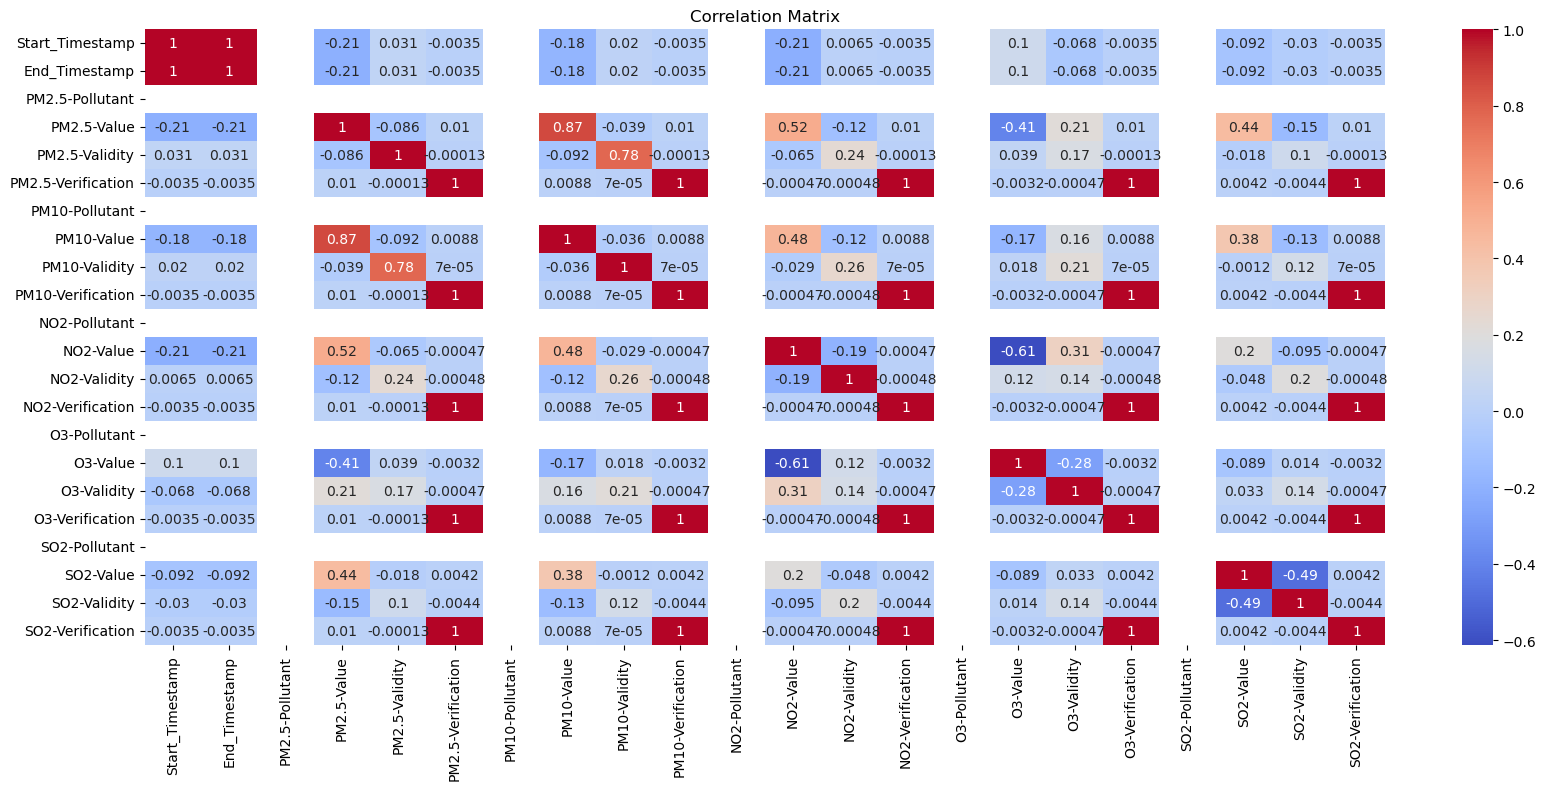

In [ ]:
eda.comprehensive_eda(df_merged)

# Different Time Frequencies

* Hourly
* Daily
* Weekly
* Monthly

In [ ]:
eda.process_date_freq_data(df_merged)

In [ ]:
df_hourly_date, df_daily_date, df_weekly_date, df_monthly_date = eda.read_date_freq()

# df_hourly_timestamp, df_daily_timestamp, df_weekly_timestamp, df_monthly_timestamp = eda.read_timestamp_freq()

## Time Series Decomposition Chart¶
Plot to see the trends and seasonality of data
Plot autocorrelation plot

## Stationary of Data

### ADF (Agumented Dicky Fuller) Test and Rolling Statistics
There are two primary way to determine whether a given time series is stationary.

* Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).
* Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics The null hypothesis is data is not stationary. if p<0.05 means null hypothesis rejected. It means data is stationary. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

## Hourly

In [ ]:

eda.analyse_data_frame(df_hourly_date)

## Daily

In [ ]:
eda.analyse_data_frame(df_daily_date)

## Weekly

In [ ]:
eda.analyse_data_frame(df_weekly_date)

In [ ]:
## Monthlty

In [ ]:
eda.analyse_data_frame(df_monthly_date)